
# NLP (Natural Language Processing) with Python

Higher level overview of the basics of Natural Language Processing, which basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand!


In [1]:
# Import the NLTK library and download the stopwords dataset
import nltk

# Download the stopwords dataset
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# nltk.download_shell()

In [3]:
messages = [line.rstrip() for line in open("smsspamcollection/SMSSpamCollection")]

In [4]:
type(messages)

list

In [5]:
len(messages)

5574

In [6]:
messages[:2]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...']

In [7]:
messages[5573]

'ham\tRofl. Its true to its name'

In [8]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print()

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341.

In [9]:
import pandas as pd

In [10]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                      names=['label', 'message'])
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### EDA

In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Let's make a new column to detect how long the text messages are:

In [14]:
messages['message'][:2]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
Name: message, dtype: object

In [15]:
messages['message'][:2].apply(len)

0    111
1     29
Name: message, dtype: int64

In [16]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Data Visualization


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Frequency'>

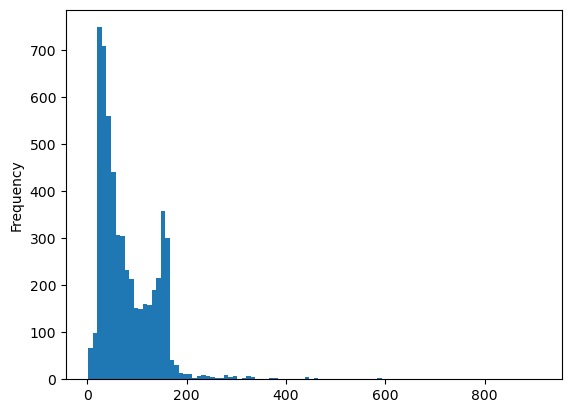

In [18]:
messages['length'].plot.hist(bins=100)

In [19]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [20]:
# outlier
messages[messages['length']==910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [21]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

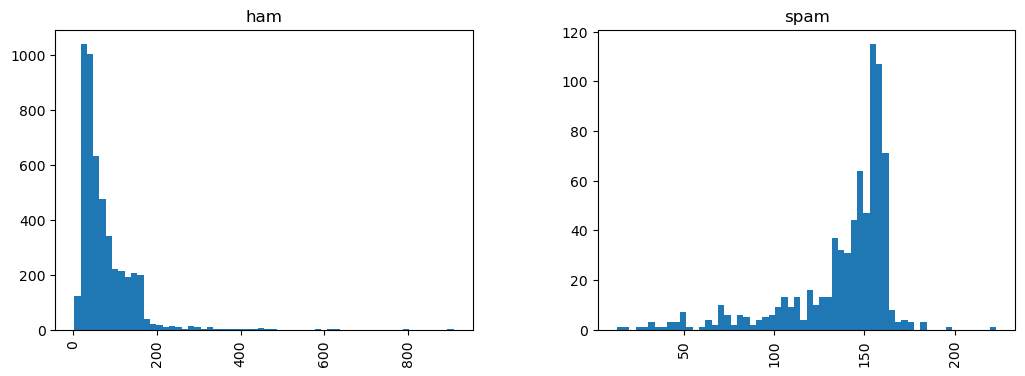

In [22]:
messages.hist(column='length', by='label', bins=60, figsize=(12,4))

## Text Pre-processing

Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. 

Convert the raw messages (sequence of characters) into vectors (sequences of numbers).

In [23]:
import string

In [24]:
mess = "Sample message! It contains some punctuations."

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
len(string.punctuation)

32

In [27]:
no_punct_mess = [char for char in mess if char not in string.punctuation]
no_punct_mess = "".join(no_punct_mess)
print(no_punct_mess)

Sample message It contains some punctuations


In [28]:
from nltk.corpus import stopwords

In [29]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [30]:
clean_mess = [word for word in no_punct_mess.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'contains', 'punctuations']

In [31]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """    
    no_punct_mess = [char for char in mess if char not in string.punctuation]
    no_punct_mess = ''.join(no_punct_mess)

    clean_mess = [word for word in no_punct_mess.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

In [32]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
messages.message.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [34]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Vectorization

Three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

**CountVectorizer** model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
# bag of words transformer
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [37]:
# total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


In [38]:
type(bow_transformer)

sklearn.feature_extraction.text.CountVectorizer

In [39]:
mess4 = messages['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [40]:
bow4 = bow_transformer.transform([mess4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [41]:
print(bow4.shape)

(1, 11425)


In [42]:
# occured twice in the sentence
bow_transformer.get_feature_names_out()[4068]

'U'

In [43]:
bow_transformer.get_feature_names_out()[9554]

'say'

Now we can use **.transform** on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages. 

In [44]:
messages_bow = bow_transformer.transform(messages['message'])

In [45]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [46]:
type(messages_bow)

scipy.sparse._csr.csr_matrix

In [47]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [48]:
messages_bow.shape[0]

5572

In [49]:
messages_bow.shape[1]

11425

In [50]:
(messages_bow.shape[0] * messages_bow.shape[1])

63660100

____
## TF-IDF
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____


In [51]:
from sklearn.feature_extraction.text import TfidfTransformer

In [52]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [53]:
tfidf4 = tfidf_transformer.transform(bow4)
print(bow4)
print()
print(tfidf4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


---
IDF (inverse document frequency) of the word `"u"` and of word `"university"`

In [54]:
bow_transformer.vocabulary_['u']

10698

In [55]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [56]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


There are many ways the data can be preprocessed and vectorized. These steps involve feature engineering and building a "pipeline".

---
## Training a model

With messages represented as vectors, we can finally train our spam/ham classifier. 

Now we can actually use almost any sort of classification algorithms.
The Naive Bayes classifier algorithm is a good choice.

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
spam_detect_model = MultinomialNB().fit(X=messages_tfidf, y=messages['label'])

In [59]:
print('predicted: ', spam_detect_model.predict(tfidf4)[0])
print('expected:  ', messages['label'][3])

predicted:  ham
expected:   ham


We've developed a model that can attempt to predict spam vs ham classification!

## Model Evaluation

In [60]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width=400 />

In [61]:
from sklearn.metrics import classification_report
print(classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



There are quite a few possible metrics for evaluating model performance. Which one is the most important depends on the task and the business effects of decisions based off of the model. For example, the cost of mis-predicting "spam" as "ham" is probably much lower than mis-predicting "ham" as "spam".

In the above "evaluation",we evaluated accuracy on the same data we used for training. **We should never actually evaluate on the same dataset we train on!**

Such evaluation tells us nothing about the true predictive power of our model. If we simply remembered each example during training, the accuracy on training data would trivially be 100%, even though we wouldn't be able to classify any new messages.

A proper way is to split the data into a training/test set, where the model only ever sees the **training data** during its model fitting and parameter tuning. The **test data** is never used in any way. This is then our final evaluation on test data is representative of true predictive performance.

## Train Test Split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train),'+', len(msg_test), '=', len(msg_train) + len(msg_test))

4457 + 1115 = 5572


## Creating a Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use.

In [64]:
from sklearn.pipeline import Pipeline

In [65]:
pipeline = Pipeline([
    # strings to token integer counts
    ("bow", CountVectorizer(analyzer=text_process)),
    # integer counts to weighted TF-IDF scores
    ('tfidf', TfidfTransformer()),
    # train on TF-IDF vectors w/ Naive Bayes classifier
    ('classifier', MultinomialNB())
])

Now we can directly pass message text data and the pipeline will do our pre-processing for us! We can treat it as a model/estimator API:

In [66]:
pipeline.fit(X=msg_train, y=label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001460CBA4180>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [67]:
predictions = pipeline.predict(msg_test)

In [68]:
predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [69]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       977
        spam       1.00      0.70      0.82       138

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [70]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    # strings to token integer counts
    ("bow", CountVectorizer(analyzer=text_process)),
    # integer counts to weighted TF-IDF scores
    ('tfidf', TfidfTransformer()),
    # train on TF-IDF vectors w/ Random Forest classifier
    ('classifier', RandomForestClassifier())
])

pipeline.fit(X=msg_train, y=label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       977
        spam       1.00      0.78      0.87       138

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

